# Loading & Info

In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

url = os.chdir(r"/content/gdrive/MyDrive")
os.getcwd()

Mounted at /content/gdrive


'/content/gdrive/MyDrive'

In [2]:
os.chdir(r"/content/gdrive/MyDrive/passenger-satisfaction-2024")

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
# df = pd.concat([df, df_test]).reset_index(drop=True)


In [4]:
df.shape

(84967, 24)

In [5]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,37576,Male,46,Returning,Business,Business,1608,0,0.0,1,...,5,5,5,3,2,5,1,5,5,Satisfied
1,56913,Male,30,Returning,Business,Business,1379,30,32.0,5,...,3,1,5,1,1,3,1,1,3,Neutral or Dissatisfied
2,6541,Female,50,Returning,Business,Business,414,0,0.0,5,...,4,5,4,5,3,4,5,4,4,Satisfied
3,40646,Female,48,Returning,Business,Economy,95,0,0.0,3,...,5,1,5,2,1,5,5,5,5,Satisfied
4,29947,Female,24,Returning,Business,Economy Plus,143,0,0.0,5,...,5,1,2,1,1,3,0,1,5,Satisfied


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84967 entries, 0 to 84966
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      84967 non-null  int64  
 1   Gender                                  84967 non-null  object 
 2   Age                                     84967 non-null  int64  
 3   Customer Type                           84967 non-null  object 
 4   Type of Travel                          84967 non-null  object 
 5   Class                                   84967 non-null  object 
 6   Flight Distance                         84967 non-null  int64  
 7   Departure Delay                         84967 non-null  int64  
 8   Arrival Delay                           84705 non-null  float64
 9   Departure and Arrival Time Convenience  84967 non-null  int64  
 10  Ease of Online Booking                  84967 non-null  in

# EDA

In [7]:
df_nan = df.isnull().sum()/df.shape[0] * 100
df_nan

,0
ID,0.000000
Gender,0.000000
Age,0.000000
Customer Type,0.000000
Type of Travel,0.000000
Class,0.000000
Flight Distance,0.000000
Departure Delay,0.000000
Arrival Delay,0.308355
Departure and Arrival Time Convenience,0.000000


In [8]:
df['Arrival Delay'] = df['Arrival Delay'].fillna(df['Departure Delay'])

In [9]:
num_df = df.select_dtypes(include=np.number)
not_num_df = df.select_dtypes(exclude=np.number)
num_keys = list(num_df.columns)
not_num_keys = list(not_num_df.columns)

for key in not_num_keys:
  print(key, ':', not_num_df[key].unique())
  print(df[key].value_counts())

Gender : ['Male' 'Female']
Gender
Female    42927
Male      42040
Name: count, dtype: int64
Customer Type : ['Returning' 'First-time']
Customer Type
Returning     71524
First-time    13443
Name: count, dtype: int64
Type of Travel : ['Business' 'Personal']
Type of Travel
Business    64961
Personal    20006
Name: count, dtype: int64
Class : ['Business' 'Economy' 'Economy Plus']
Class
Business        48243
Economy         31423
Economy Plus     5301
Name: count, dtype: int64
Satisfaction : ['Satisfied' 'Neutral or Dissatisfied']
Satisfaction
Satisfied                  51914
Neutral or Dissatisfied    33053
Name: count, dtype: int64


In [10]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df['Customer Type'] = df['Customer Type'].replace({'Returning': 0, 'First-time': 1})
df['Type of Travel'] = df['Type of Travel'].replace({'Business': 0, 'Personal': 1})
df['Class'] = df['Class'].replace({'Economy': 0, 'Economy Plus': 1, 'Business': 2})
df['Satisfaction'] = df['Satisfaction'].replace({'Neutral or Dissatisfied': 0, 'Satisfied': 1})

<ipython-input-10-d833fc8ee102>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
<ipython-input-10-d833fc8ee102>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Customer Type'] = df['Customer Type'].replace({'Returning': 0, 'First-time': 1})
<ipython-input-10-d833fc8ee102>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-i

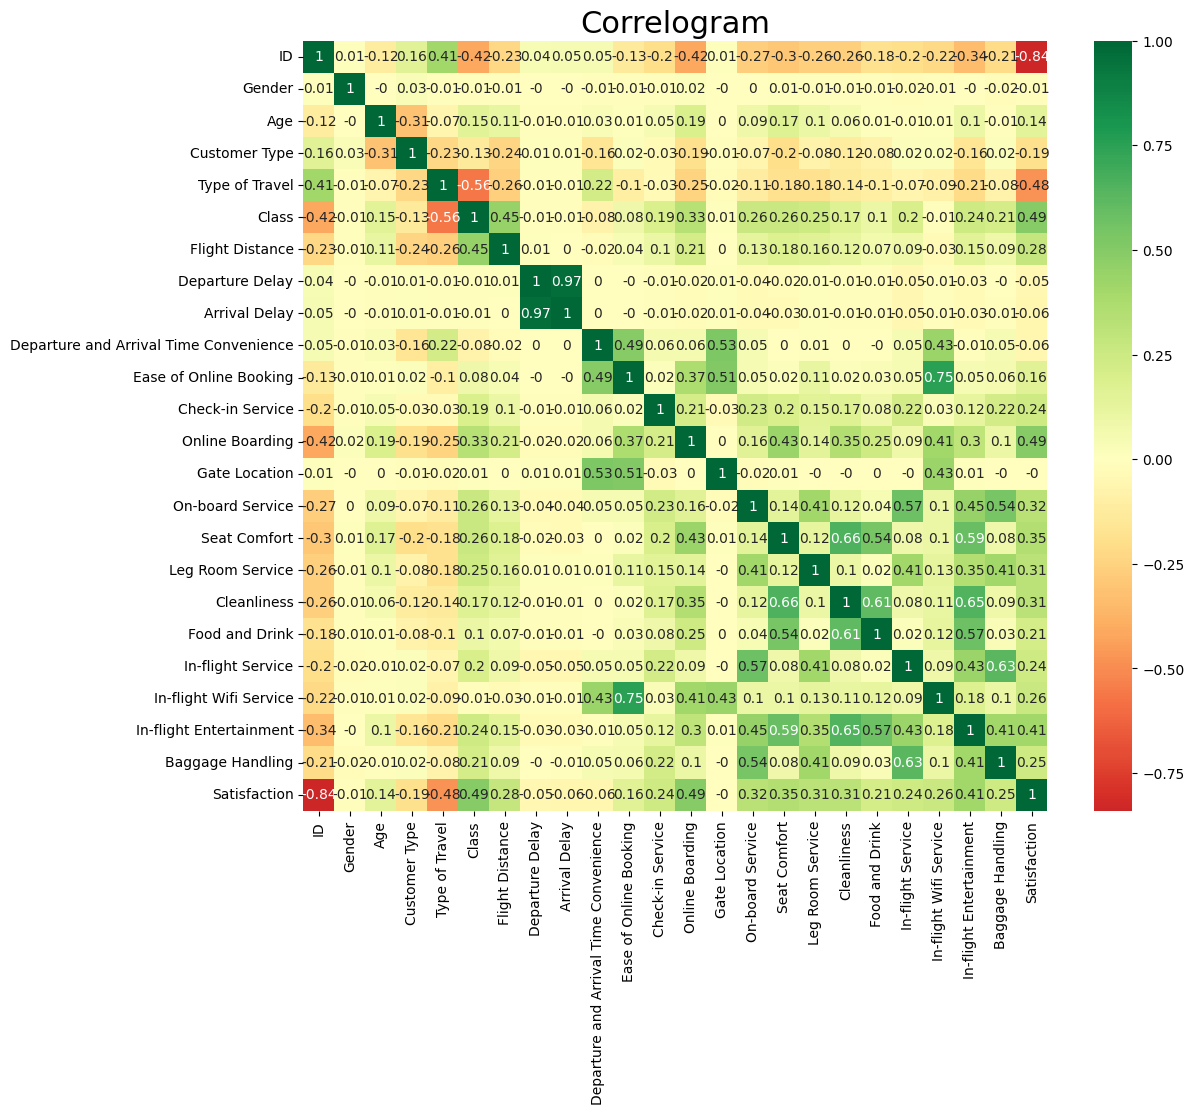

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True).round(2), xticklabels=df.corr(numeric_only=True).columns, yticklabels=df.corr(numeric_only=True).columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [12]:
df = df.drop(['Arrival Delay'], axis=1)

In [13]:
df = df.drop(['ID'], axis=1)
# df = df.drop(['Gender'], axis=1)
# df = df.drop(['Gate Location'], axis=1)

# Подбираем модель



In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = df.drop(columns=['Satisfaction'])
y = df['Satisfaction']

std = StandardScaler()
mmsc = MinMaxScaler()
X_norm = mmsc.fit_transform(X)

X_norm = pd.DataFrame(X_norm, columns=X.columns)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split



# smote = SMOTE()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# X_train = X_norm.iloc[0:84967]
# X_test = X_norm.iloc[84967:]
# y_train = y[0:84967]
# y_test = y[84967:]

adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [17]:
y_resampled.value_counts()

,count
Satisfaction,
0,37011
1,36332


In [18]:
# model = RandomForestClassifier(n_estimators=200, random_state=42, min_samples_split=5, min_samples_leaf=1, max_features='log2', max_depth=30)
model = RandomForestClassifier(n_estimators=150, random_state=42)

model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

In [19]:
y_resampled.value_counts()

,count
Satisfaction,
0,37011
1,36332


In [21]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix

array([[ 9461,   448],
       [  710, 14872]])

In [23]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='micro')

f1

0.9545722019536307

# Обучение

In [24]:
id = df_test['ID']

df_test = df_test.drop(columns = ['Arrival Delay', 'ID'])

In [25]:
df_test['Gender'] = df_test['Gender'].replace(['Male', 'Female'], [0, 1])
df_test['Customer Type'] = df_test['Customer Type'].replace({'Returning': 0, 'First-time': 1})
df_test['Type of Travel'] = df_test['Type of Travel'].replace({'Business': 0, 'Personal': 1})
df_test['Class'] = df_test['Class'].replace({'Economy': 0, 'Economy Plus': 1, 'Business': 2})

<ipython-input-25-55d5937ee181>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Gender'] = df_test['Gender'].replace(['Male', 'Female'], [0, 1])
<ipython-input-25-55d5937ee181>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Customer Type'] = df_test['Customer Type'].replace({'Returning': 0, 'First-time': 1})
<ipython-input-25-55d5937ee181>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(

In [26]:
X_norm = mmsc.fit_transform(df_test)

X_norm = pd.DataFrame(X_norm, columns=X.columns)

In [27]:
prediction = model.predict(X_norm)

In [28]:
ans = pd.DataFrame({'ID': id, 'Satisfaction': prediction})
ans.to_csv('ans.csv', index=False)

In [29]:
# fp = np.where((y_test == 0) & (y_pred == 1))[0]
# fn = np.where((y_test == 1) & (y_pred == 0))[0]

# fp_df = X_test.iloc[fp]
# fn_df = X_test.iloc[fn]

In [30]:
# print(fp_df['Class'].value_counts()/df['Class'].value_counts())

In [31]:
# print(fn_df['Class'].value_counts()/df['Class'].value_counts())

In [32]:
# import xgboost as xgb

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


# # X_train = X.iloc[0:84967]
# # X_test = X.iloc[84967:]
# # y_train = y[0:84967]
# # y_test = y[84967:]

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)


In [33]:
# conf_matrix = confusion_matrix(y_test, y_pred)

# conf_matrix

In [34]:
# f1 = f1_score(y_test, y_pred, average='micro')

# f1

In [35]:
# df1 = pd.DataFrame(y_pred)
# df1['ID'] = df_test['ID']
# df1['Satisfaction'] = df1[0]
# df1 = df1.drop([0], axis=1)
# df1.to_csv('output.csv', index=False)

# df1.shape